## Problem statement:
    Build a model to forecast the demand(passengertraffic)in Airplanes.
    The data is classified in date/time and the passengers travelling per month

In [136]:
import pandas as pd
#data process
import numpy as np
import matplotlib.pyplot as plt
#visualisation
%matplotlib inline
 # get plot in jupyter window itself
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
#define size

In [137]:
data=pd.read_csv(r"C:\Users\Keerthana\Desktop\SEM 3\EDA\AirPassengers.csv")

In [138]:
data

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [139]:
type(data['Month'])

pandas.core.series.Series

In [140]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [141]:
#data.Month=data.Month.astype("datetime64")

In [142]:
#parse string to datetime type
data.Month=pd.to_datetime(data["Month"])

In [143]:
data

Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
139 1960-08-01          606
140 1960-09-01          508
141 1960-10-01          461
142 1960-11-01          390
143 1960-12-01          432

[144 rows x 2 columns]

In [144]:
new_data=data.set_index(['Month'])

In [145]:
new_data

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [146]:
from datetime import datetime
new_data.describe()

#Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000

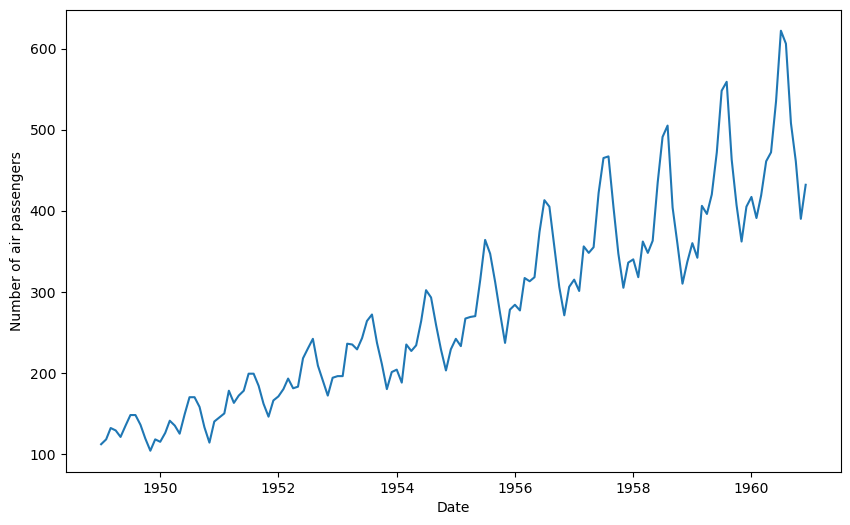

In [147]:
#plot graph
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(new_data)


In [148]:
#trend exists

In [149]:
#the trend is increasing ---no stationarity

In [150]:
#the mean at 1951  or 1960 lie at diff pts---upward trend non constant mean 

In [151]:
#make it stationary

In [152]:
#Determine the rolling statistics

In [153]:
rolmean=new_data.rolling(window=12).mean()
rolstd=new_data.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [154]:
#initail 11 NAN values are averaged and stored in one 1949 data

In [155]:
#if the data is given on daily basis then window = 365

In [156]:
#here monthly data is given

In [157]:
#plot the rolling statistics

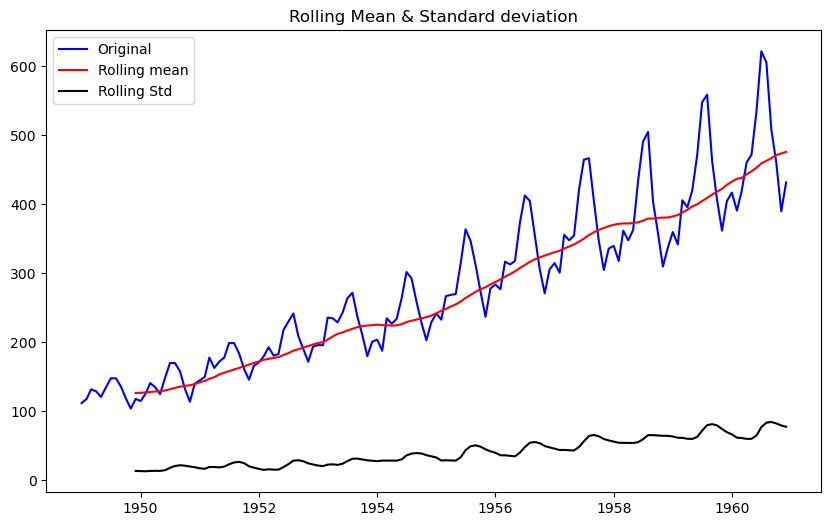

In [158]:
ori=plt.plot(new_data,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean & Standard deviation")
plt.show(block=False)

In [159]:
#Perform Dickey fuller test

In [160]:
from statsmodels.tsa.stattools import adfuller
print('Dickey fuller test:')
adftest=adfuller(new_data['#Passengers'],autolag='AIC') 
'''output=pd.Series(dftest[0:4],index=["Test statistic","p-value","#Lags used","Number of observations used"])
for key,value in dftest[4].items:
    output['Critical value (%s)'%key]=value
print(output)'''

Dickey fuller test:


'output=pd.Series(dftest[0:4],index=["Test statistic","p-value","#Lags used","Number of observations used"])\nfor key,value in dftest[4].items:\n    output[\'Critical value (%s)\'%key]=value\nprint(output)'

In [161]:
print(adftest)

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [162]:
#Estimate the trend

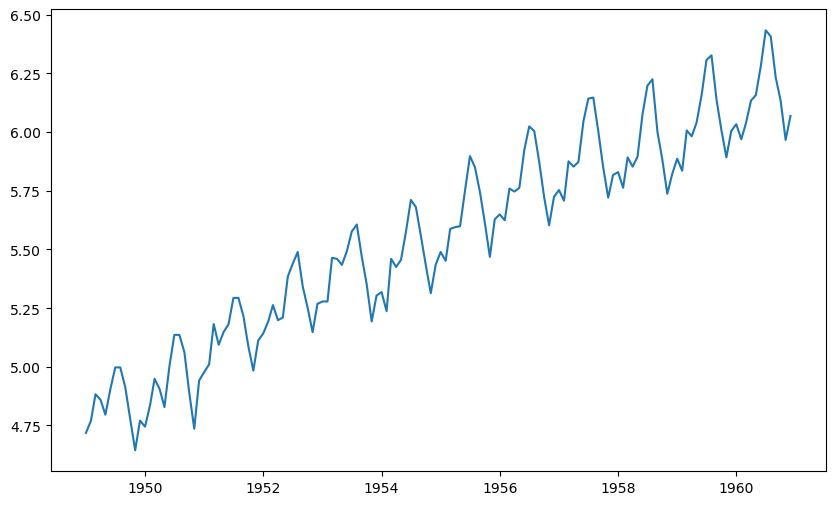

In [163]:
indexeddataset_logscale=np.log(new_data)
plt.plot(indexeddataset_logscale)
#y axis numbers have changed
#trend remains same

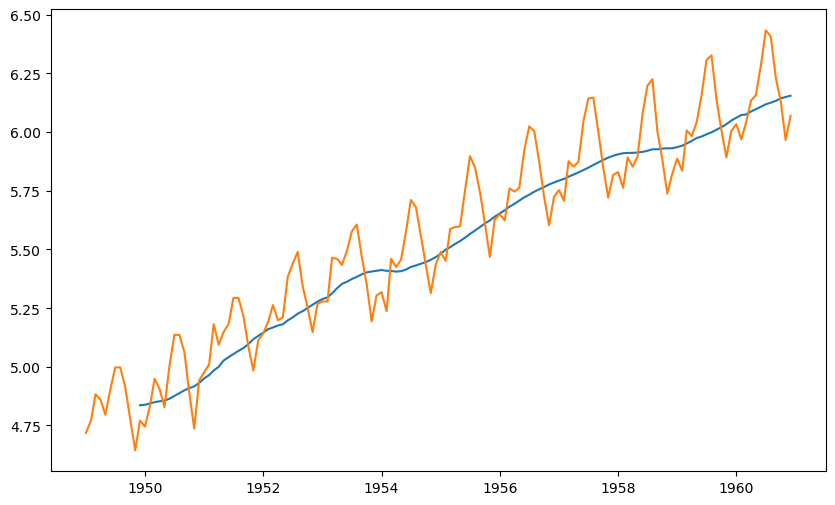

In [164]:
movingav=indexeddataset_logscale.rolling(window=12).mean()
movingstd=indexeddataset_logscale.rolling(window=12).std()
plt.plot(movingav)
#plt.plot(movingstd)
plt.plot(indexeddataset_logscale)

In [165]:
#mean moves with time in the upward trend

In [190]:
indexeddataset_logscalemovingav=indexeddataset_logscale-movingav
#difference b/w moving average and actual number of passengers
#to make it stationary 
indexeddataset_logscalemovingav.head(12)
#remove nan values
indexeddataset_logscalemovingav.dropna(inplace=True)
indexeddataset_logscalemovingav.head(10)

#Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937

In [167]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingav=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    ori=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingav,color='red',label='Rolling mean')
    std=plt.plot(movingstd,color='black',label='Rolling Std')
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard deviation")
    plt.show(block=False)
    print('Dickey fuller test:')
    adftest=adfuller(timeseries['#Passengers'],autolag='AIC') 
    print(adftest)

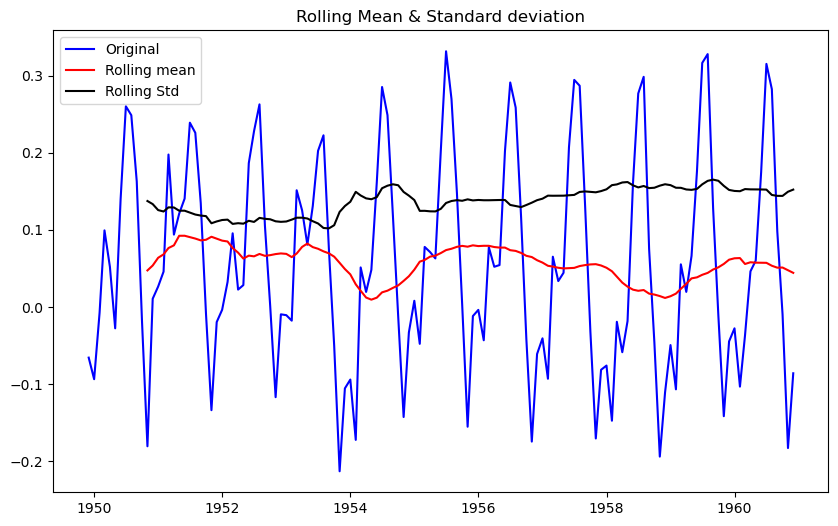

Dickey fuller test:
(-3.1629079913008766, 0.02223463000124264, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


In [168]:
test_stationary(indexeddataset_logscalemovingav)

In [169]:
#not much trend here,lesser p value critical and test stat value similar

In [170]:
#shift the stationary to timeseries for forecasting

In [171]:
datasetlogshifting=indexeddataset_logscale-indexeddataset_logscale.shift()

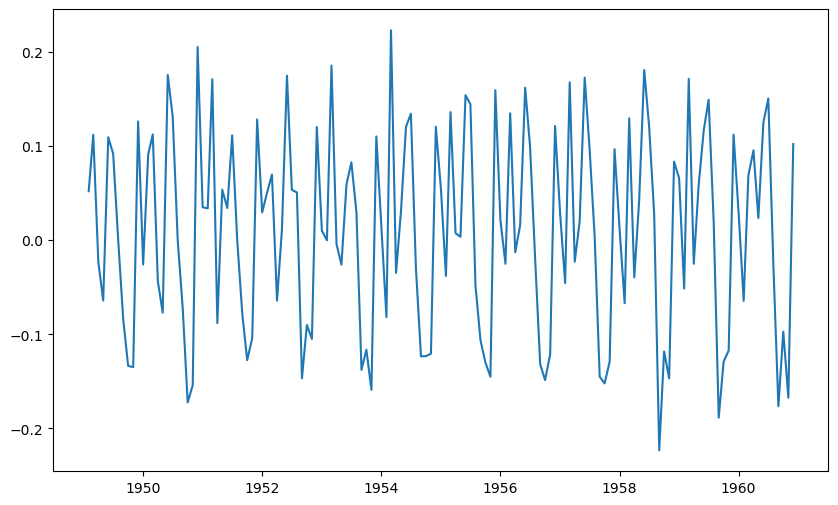

In [172]:
 plt.plot(datasetlogshifting)

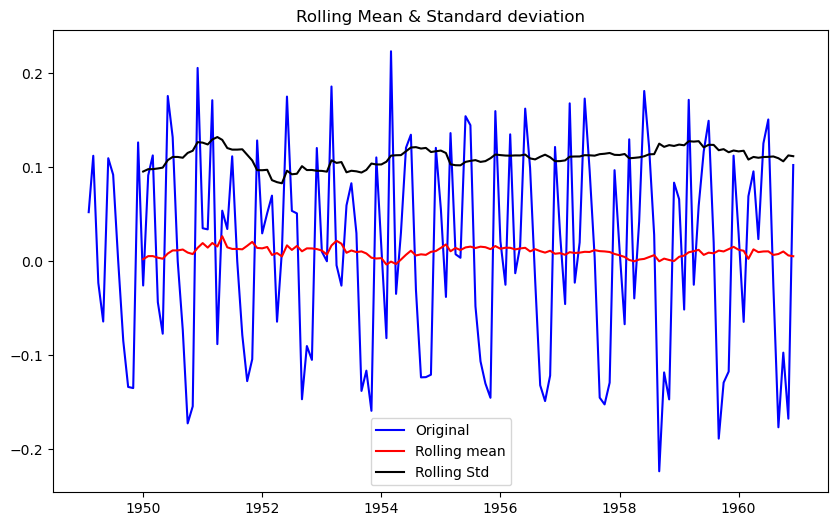

Dickey fuller test:
(-2.7171305983881675, 0.07112054815085295, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)


In [173]:
datasetlogshifting.dropna(inplace=True)
test_stationary(datasetlogshifting)

In [174]:
#components of time series

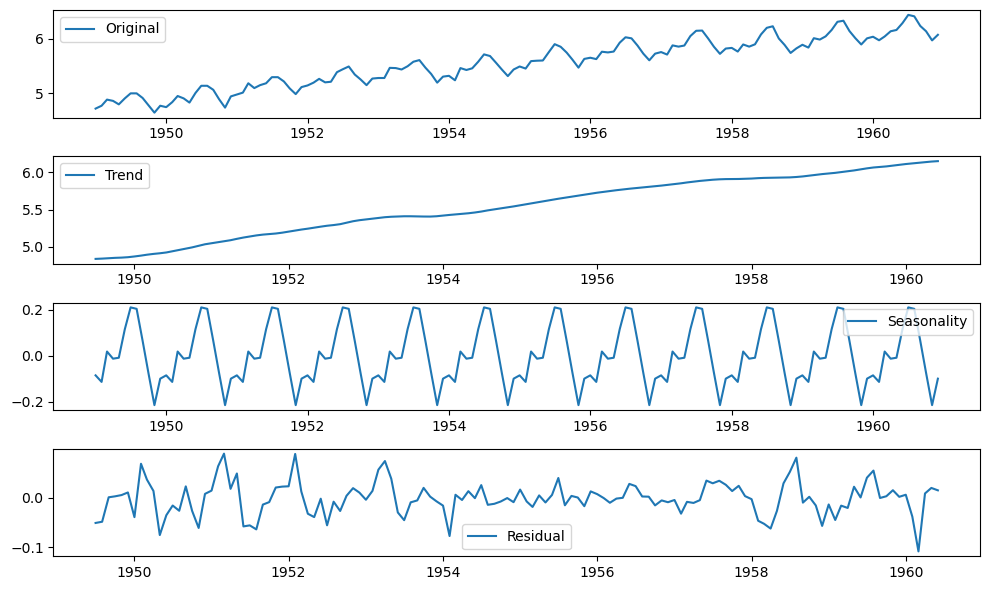

In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexeddataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexeddataset_logscale,label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend(loc='best')
plt.tight_layout()



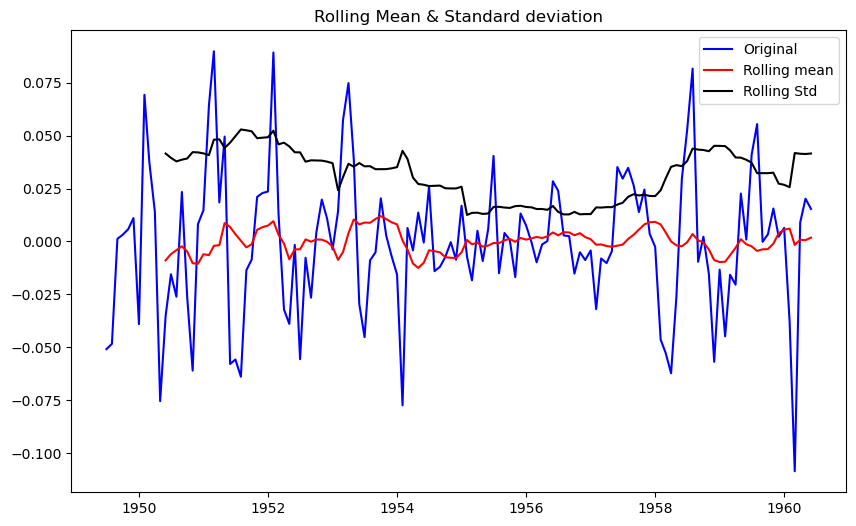

Dickey fuller test:


KeyError: '#Passengers'

In [176]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

In [178]:
from statsmodels.tsa.stattools import acf,pacf
d_acf=acf(datasetlogshifting,nlags=20)
d_pacf=pacf(datasetlogshifting,nlags=20,method='ols')

Text(0.5, 1.0, 'Partial Auto corelation function')

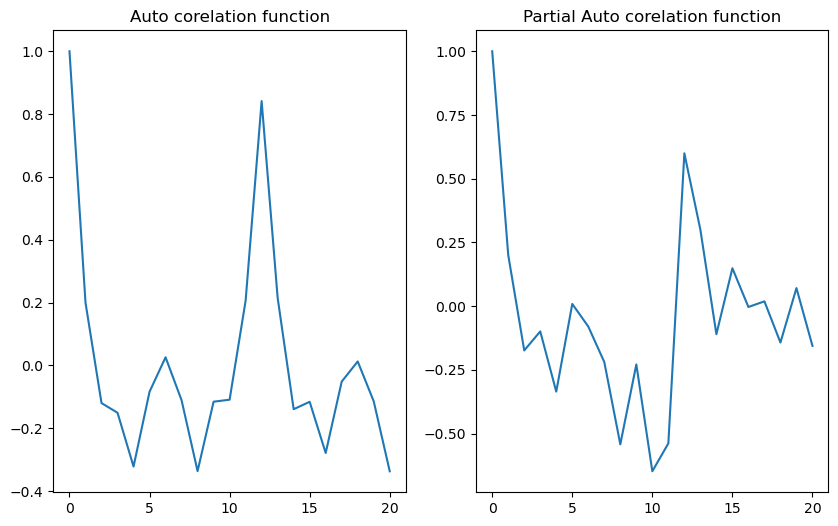

In [179]:
#plot acf and pacf
plt.subplot(121)
plt.plot(d_acf)
plt.title("Auto corelation function")
plt.subplot(122)
plt.plot(d_pacf)
plt.title("Partial Auto corelation function")

In [180]:
from statsmodels.tsa.arima.model import ARIMA
#AR MODEL
model=ARIMA(indexeddataset_logscale,order=(2,2,1))
results_ar=model.fit()
#plt.plot(results_ar.fittedvalues,color-'red')
res=results_ar.forecast(12)

C:\Users\Keerthana\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Keerthana\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Keerthana\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [181]:
res=pd.DataFrame(res)

In [182]:
#append the predicted value to the original data

In [183]:
res.columns=['#Passengers']
res

#Passengers
1961-01-01     6.129881
1961-02-01     6.136587
1961-03-01     6.136863
1961-04-01     6.144701
1961-05-01     6.155438
1961-06-01     6.165615
1961-07-01     6.175175
1961-08-01     6.184679
1961-09-01     6.194272
1961-10-01     6.203896
1961-11-01     6.213513
1961-12-01     6.223123

In [184]:
final=pd.DataFrame(indexeddataset_logscale)
final

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]

In [185]:
pred=final.append(res)

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11400\3281181165.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=final.append(res)


In [186]:
pred

#Passengers
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1961-08-01     6.184679
1961-09-01     6.194272
1961-10-01     6.203896
1961-11-01     6.213513
1961-12-01     6.223123

[156 rows x 1 columns]

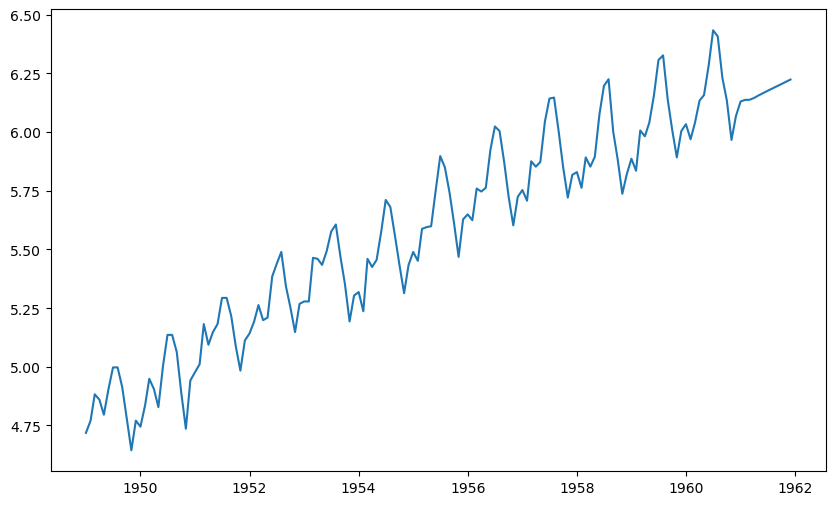

In [187]:
plt.plot(pred)